# Regression Benchmark Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../big_mart_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Train and Test Set

In [6]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
shuffled_indices = np.random.permutation(df.shape[0])

# identify division
test_size = int(df.shape[0] * 0.2)

# 80% percent for train and 20% for test
train_set = df.iloc[shuffled_indices[:4 * test_size]]
test_set = df.iloc[shuffled_indices[4 * test_size:]]

df.shape, train_set.shape, test_set.shape

((8523, 12), (6816, 12), (1707, 12))

In [7]:
train_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1713,NCY05,NaN,Low Fat,0.054724,Health and Hygiene,36.6874,OUT027,1985,Medium,Tier 3,Supermarket Type3,1058.6220
121,DRJ13,12.65,LF,0.063018,Soft Drinks,159.0578,OUT045,2002,NaN,Tier 2,Supermarket Type1,2085.9514
2466,FDJ55,12.80,Regular,0.023531,Meat,223.5404,OUT046,1997,Small,Tier 1,Supermarket Type1,1800.3232
1824,FDZ45,14.10,Low Fat,0.111937,Snack Foods,198.8084,OUT010,1998,NaN,Tier 3,Grocery Store,992.0420
4205,FDI20,19.10,Low Fat,0.038532,Fruits and Vegetables,210.6586,OUT013,1987,High,Tier 3,Supermarket Type1,5487.5236


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

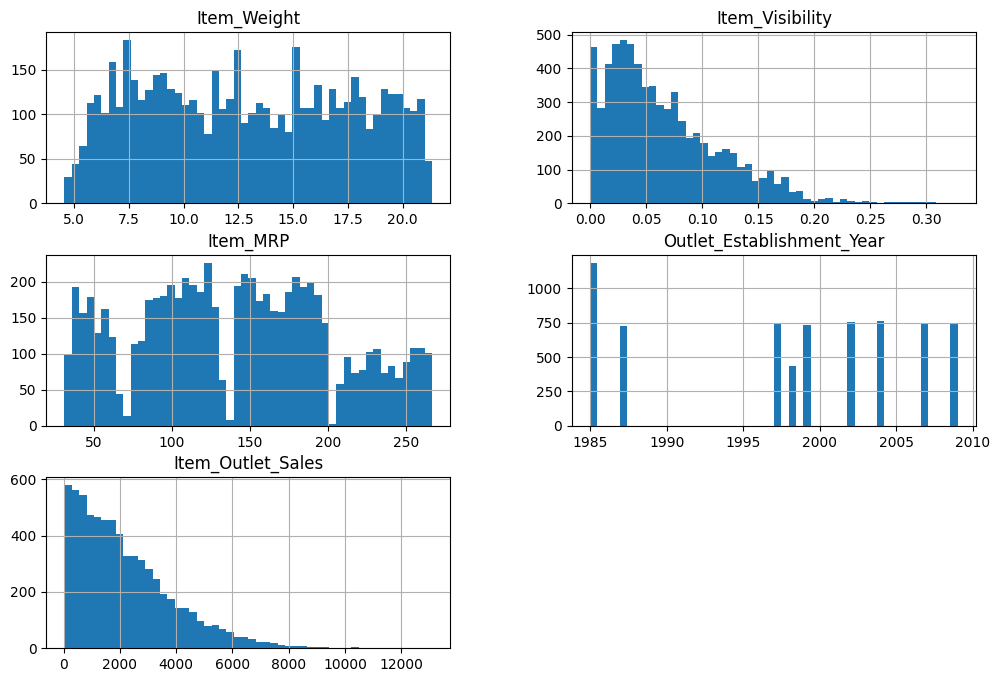

In [8]:
train_set.hist(bins=50, figsize=(12, 8))

In [9]:
test_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1899,FDT26,18.850,Regular,0.067941,Dairy,119.0440,OUT035,2004,Small,Tier 2,Supermarket Type1,1198.4400
5456,FDY59,NaN,Low Fat,0.031251,Baking Goods,93.3462,OUT027,1985,Medium,Tier 3,Supermarket Type3,1018.0082
5091,NCS06,7.935,Low Fat,0.031801,Household,261.5910,OUT045,2002,NaN,Tier 2,Supermarket Type1,3155.8920
8333,FDC41,15.600,Low Fat,0.116816,Frozen Foods,75.5670,OUT013,1987,High,Tier 3,Supermarket Type1,1684.4740
7683,FDU26,16.700,Regular,0.042685,Dairy,120.7782,OUT049,1999,Medium,Tier 1,Supermarket Type1,1072.6038


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

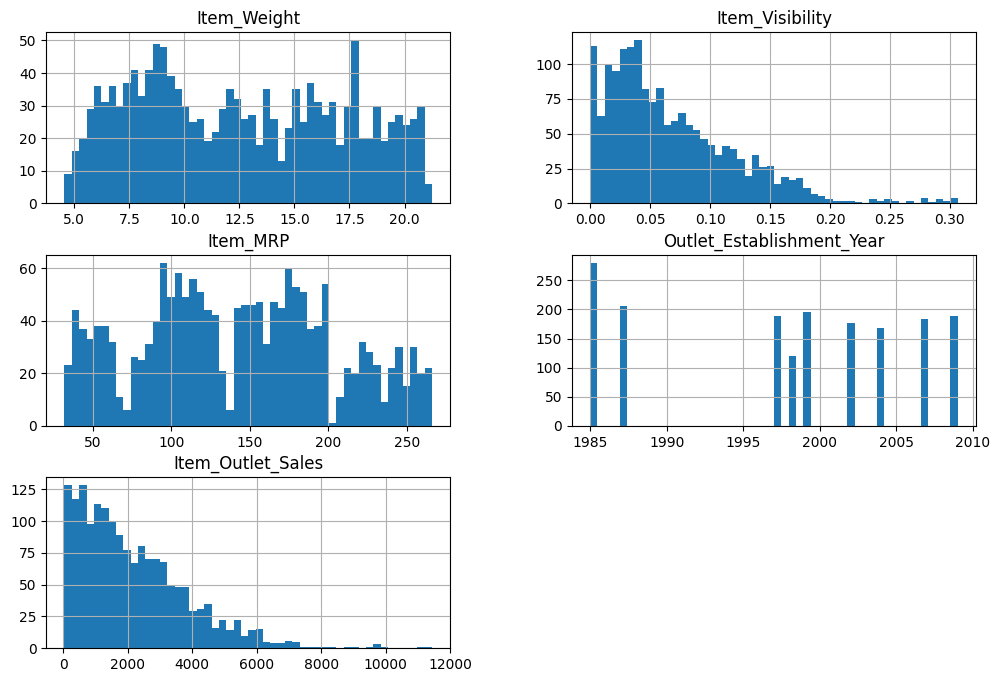

In [10]:
test_set.hist(bins=50, figsize=(12, 8))

### Simple Mean - Item_Outlet_Sales

In [11]:
simple_mean = train_set['Item_Outlet_Sales'].mean()

# Create a simple_mean column and fill with mean from 0th row
test_set.insert(0, 'simple_mean', simple_mean)
test_set.head()

,simple_mean,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1899,2183.649442,FDT26,18.850,Regular,0.067941,Dairy,119.0440,OUT035,2004,Small,Tier 2,Supermarket Type1,1198.4400
5456,2183.649442,FDY59,NaN,Low Fat,0.031251,Baking Goods,93.3462,OUT027,1985,Medium,Tier 3,Supermarket Type3,1018.0082
5091,2183.649442,NCS06,7.935,Low Fat,0.031801,Household,261.5910,OUT045,2002,NaN,Tier 2,Supermarket Type1,3155.8920
8333,2183.649442,FDC41,15.600,Low Fat,0.116816,Frozen Foods,75.5670,OUT013,1987,High,Tier 3,Supermarket Type1,1684.4740
7683,2183.649442,FDU26,16.700,Regular,0.042685,Dairy,120.7782,OUT049,1999,Medium,Tier 1,Supermarket Type1,1072.6038


In [12]:
from sklearn.metrics import mean_absolute_error

simple_mean_error = mean_absolute_error(test_set['Item_Outlet_Sales'], test_set['simple_mean'])
simple_mean_error

1339.7910461661766

### Mean Item Outlet Sales with respect to Outlet_Type

In [13]:
out_type = pd.pivot_table(data=train_set, values='Item_Outlet_Sales', index='Outlet_Type', aggfunc=np.mean)
out_type

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,337.631298
Supermarket Type1,2311.706587
Supermarket Type2,1999.490072
Supermarket Type3,3691.450671


In [14]:
mean_sales_by_outlet_type = train_set.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
mean_sales_by_outlet_type

Outlet_Type
Grocery Store         337.631298
Supermarket Type1    2311.706587
Supermarket Type2    1999.490072
Supermarket Type3    3691.450671
Name: Item_Outlet_Sales, dtype: float64

In [25]:
pd.options.mode.chained_assignment = None # SettingWithCopy warning

test_set['Outlet_Type_Mean'] = test_set['Outlet_Type'].map(mean_sales_by_outlet_type)
test_set.head(7)

,simple_mean,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type_Mean
1899,2183.649442,FDT26,18.850,Regular,0.067941,Dairy,119.0440,OUT035,2004,Small,Tier 2,Supermarket Type1,1198.4400,2311.706587
5456,2183.649442,FDY59,NaN,Low Fat,0.031251,Baking Goods,93.3462,OUT027,1985,Medium,Tier 3,Supermarket Type3,1018.0082,3691.450671
5091,2183.649442,NCS06,7.935,Low Fat,0.031801,Household,261.5910,OUT045,2002,NaN,Tier 2,Supermarket Type1,3155.8920,2311.706587
8333,2183.649442,FDC41,15.600,Low Fat,0.116816,Frozen Foods,75.5670,OUT013,1987,High,Tier 3,Supermarket Type1,1684.4740,2311.706587
7683,2183.649442,FDU26,16.700,Regular,0.042685,Dairy,120.7782,OUT049,1999,Medium,Tier 1,Supermarket Type1,1072.6038,2311.706587
4177,2183.649442,FDE11,17.700,Regular,0.135646,Starchy Foods,186.0924,OUT018,2009,Medium,Tier 3,Supermarket Type2,3516.7556,1999.490072
5188,2183.649442,FDF26,6.825,Regular,0.046825,Canned,155.1998,OUT018,2009,Medium,Tier 3,Supermarket Type2,2460.7968,1999.490072


In [22]:
outlet_type_error = mean_absolute_error(test_set.Item_Outlet_Sales, test_set.Outlet_Type_Mean)
outlet_type_error

1101.7285568712407

### Mean Item Outlet Sales with respect to Outlet_Establishment_Year

In [27]:
outlet_year = pd.pivot_table(train_set, values='Item_Outlet_Sales', index='Outlet_Establishment_Year', aggfunc=np.mean)
outlet_year

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2493.855487
1987,2295.657307
1997,2300.940107
1998,340.949292
1999,2323.508659
2002,2157.020466
2004,2445.639802
2007,2345.922970
2009,1999.490072


In [30]:
# Group train by Outlet_Establishment_Year and then use the mean of Item_Outlet_Sales as aggregation func
mean_sales_by_outlet_year = train_set.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

# Map the mean values
test_set['Outlet_Year_Mean'] = test_set['Outlet_Establishment_Year'].map(mean_sales_by_outlet_year)
test_set.head(7)

,simple_mean,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type_Mean,Outlet_Year_Mean
1899,2183.649442,FDT26,18.850,Regular,0.067941,Dairy,119.0440,OUT035,2004,Small,Tier 2,Supermarket Type1,1198.4400,2311.706587,2445.639802
5456,2183.649442,FDY59,NaN,Low Fat,0.031251,Baking Goods,93.3462,OUT027,1985,Medium,Tier 3,Supermarket Type3,1018.0082,3691.450671,2493.855487
5091,2183.649442,NCS06,7.935,Low Fat,0.031801,Household,261.5910,OUT045,2002,NaN,Tier 2,Supermarket Type1,3155.8920,2311.706587,2157.020466
8333,2183.649442,FDC41,15.600,Low Fat,0.116816,Frozen Foods,75.5670,OUT013,1987,High,Tier 3,Supermarket Type1,1684.4740,2311.706587,2295.657307
7683,2183.649442,FDU26,16.700,Regular,0.042685,Dairy,120.7782,OUT049,1999,Medium,Tier 1,Supermarket Type1,1072.6038,2311.706587,2323.508659
4177,2183.649442,FDE11,17.700,Regular,0.135646,Starchy Foods,186.0924,OUT018,2009,Medium,Tier 3,Supermarket Type2,3516.7556,1999.490072,1999.490072
5188,2183.649442,FDF26,6.825,Regular,0.046825,Canned,155.1998,OUT018,2009,Medium,Tier 3,Supermarket Type2,2460.7968,1999.490072,1999.490072


In [31]:
outlet_year_error = mean_absolute_error(test_set.Item_Outlet_Sales, test_set.Outlet_Year_Mean)
outlet_year_error

1235.4651020670099

### Mean Item Outlet Sales with respect to Outlet_Location_Type

In [32]:
outlet_location_type = pd.pivot_table(train_set, values='Item_Outlet_Sales', index='Outlet_Location_Type', aggfunc=np.mean)
outlet_location_type

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1872.160809
Tier 2,2316.565699
Tier 3,2292.928911


In [33]:
# Group train by Outlet_Location_Type and then use the mean of Item_Outlet_Sales as aggregation func
mean_sales_by_location = train_set.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

# Map the mean values
test_set['Outlet_Location_Mean'] = test_set['Outlet_Location_Type'].map(mean_sales_by_location)
test_set.head(7)

,simple_mean,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type_Mean,Outlet_Year_Mean,Outlet_Location_Mean
1899,2183.649442,FDT26,18.850,Regular,0.067941,Dairy,119.0440,OUT035,2004,Small,Tier 2,Supermarket Type1,1198.4400,2311.706587,2445.639802,2316.565699
5456,2183.649442,FDY59,NaN,Low Fat,0.031251,Baking Goods,93.3462,OUT027,1985,Medium,Tier 3,Supermarket Type3,1018.0082,3691.450671,2493.855487,2292.928911
5091,2183.649442,NCS06,7.935,Low Fat,0.031801,Household,261.5910,OUT045,2002,NaN,Tier 2,Supermarket Type1,3155.8920,2311.706587,2157.020466,2316.565699
8333,2183.649442,FDC41,15.600,Low Fat,0.116816,Frozen Foods,75.5670,OUT013,1987,High,Tier 3,Supermarket Type1,1684.4740,2311.706587,2295.657307,2292.928911
7683,2183.649442,FDU26,16.700,Regular,0.042685,Dairy,120.7782,OUT049,1999,Medium,Tier 1,Supermarket Type1,1072.6038,2311.706587,2323.508659,1872.160809
4177,2183.649442,FDE11,17.700,Regular,0.135646,Starchy Foods,186.0924,OUT018,2009,Medium,Tier 3,Supermarket Type2,3516.7556,1999.490072,1999.490072,2292.928911
5188,2183.649442,FDF26,6.825,Regular,0.046825,Canned,155.1998,OUT018,2009,Medium,Tier 3,Supermarket Type2,2460.7968,1999.490072,1999.490072,2292.928911


In [34]:
outlet_location_error = mean_absolute_error(test_set.Item_Outlet_Sales, test_set.Outlet_Location_Mean)
outlet_location_error

1332.3302415273167

### Mean Item_Outlet_Sales with respect to both Outlet_Location_Type and Outlet_Establishment_Year

In [40]:
c1 = 'Item_Outlet_Sales'
c2 = 'Outlet_Location_Type'
c3 = 'Outlet_Establishment_Year'

type_year = pd.pivot_table(train_set, values=c1, index=[c2, c3], aggfunc=np.mean)
type_year

Item_Outlet_Sales
Outlet_Location_Type Outlet_Establishment_Year                   
Tier 1               1985                              334.211090
                     1997                             2300.940107
                     1999                             2323.508659
Tier 2               2002                             2157.020466
                     2004                             2445.639802
                     2007                             2345.922970
Tier 3               1985                             3691.450671
                     1987                             2295.657307
                     1998                              340.949292
                     2009                             1999.490072

In [42]:
mean_sales_by_type_year = train_set.groupby([c2, c3])[c1].mean()

test_set['Type_Year_Mean'] = test_set.apply(lambda x: mean_sales_by_type_year.loc[x[c2], x[c3]], axis=1)
test_set[[c1, c2, c3, 'Type_Year_Mean']].head(10)

,Item_Outlet_Sales,Outlet_Location_Type,Outlet_Establishment_Year,Type_Year_Mean
1899,1198.4400,Tier 2,2004,2445.639802
5456,1018.0082,Tier 3,1985,3691.450671
5091,3155.8920,Tier 2,2002,2157.020466
8333,1684.4740,Tier 3,1987,2295.657307
7683,1072.6038,Tier 1,1999,2323.508659
4177,3516.7556,Tier 3,2009,1999.490072
5188,2460.7968,Tier 3,2009,1999.490072
2522,2396.8800,Tier 3,1985,3691.450671
5425,5329.0632,Tier 3,1985,3691.450671
281,6088.0752,Tier 2,2004,2445.639802


In [43]:
type_year_error = mean_absolute_error(test_set.Item_Outlet_Sales, test_set.Type_Year_Mean)
type_year_error

1102.49353593936